# Project two using patients no_show dataset

## quetions to be answered:
which parameter/s might affect the patients attendence for their appointment

## Student name: Hatem Amin, hk_amin@yahoo.com

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [183]:
df=pd.read_csv("no_showappointments-kagglev2-may-2016.csv")

# Exploring the data 

In [184]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [186]:
df.shape

(110527, 14)

In [187]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# Cleaning the data

In [188]:
df.rename(columns=lambda x:x.strip().lower().replace("-","_"), inplace=True)#make all names lower string and underscored
df.rename(columns={"hipertension":"hypertension"},inplace=True)#rename wrong column name 
df.rename(columns={"handcap":"handicap"},inplace=True)#rename wrong column name 

In [189]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [190]:
df.drop(["patientid","appointmentid","scheduledday","appointmentday"],axis=1,inplace=True)

In [191]:
df.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96e716efd0>,
      dtype=object)

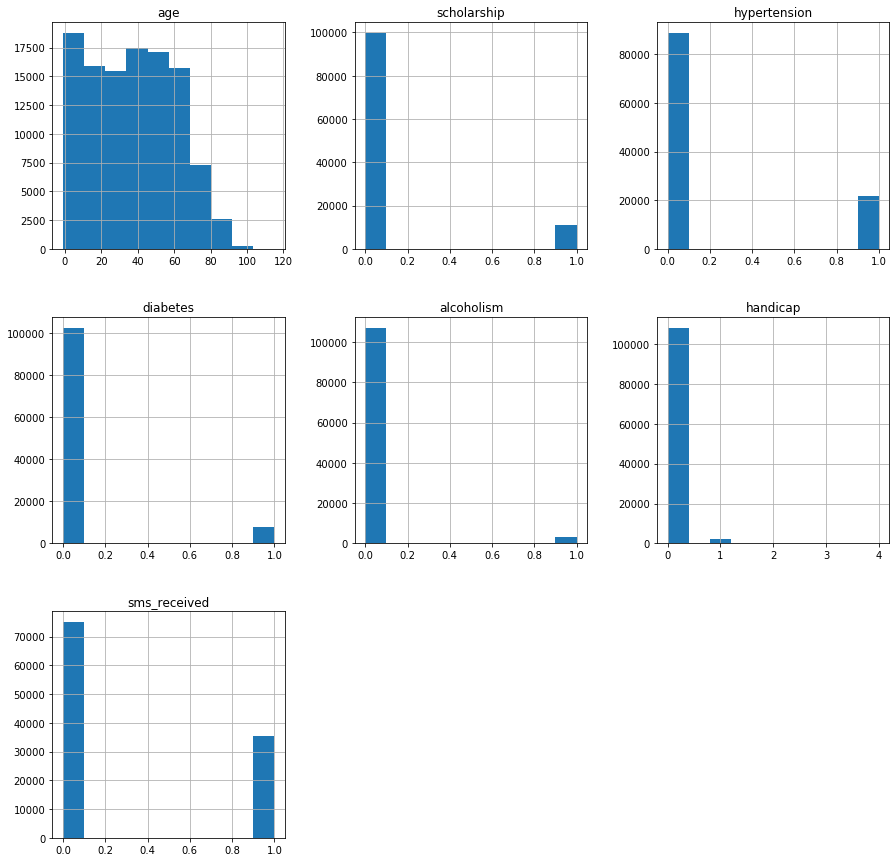

In [192]:
df.hist(figsize=(15,15))

In [195]:
show=df["no_show"]=="No"
absent=df["no_show"]=="Yes"

In [196]:
df.age[show].mean()

37.790064393252315

In [197]:
df.age[absent].mean()

34.31766656212196

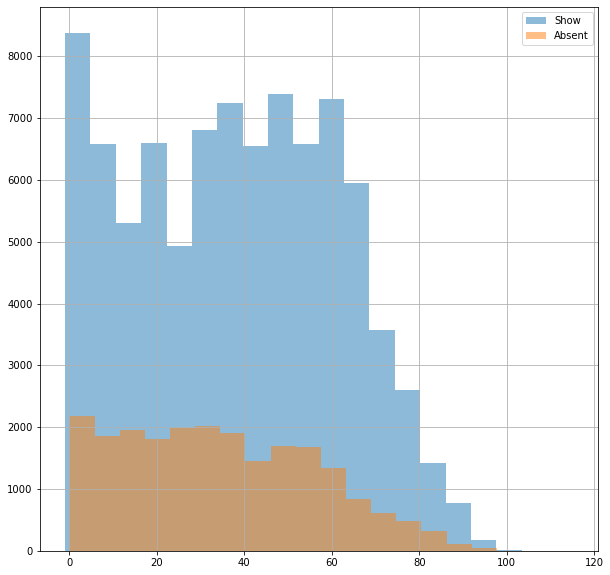

In [222]:
df.age[show].hist(figsize=(10,10),bins=20,alpha=0.5,label="Show")
df.age[absent].hist(figsize=(10,10),bins=20,alpha=0.5,label="Absent")
plt.legend()

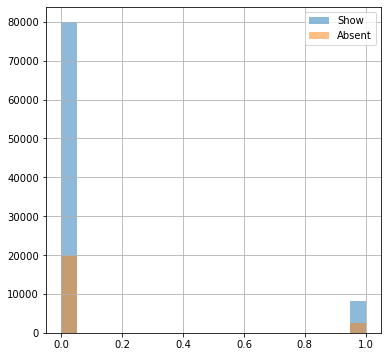

In [221]:
df.scholarship[show].hist(figsize=(6,6),bins=20,alpha=0.5,label="Show")
df.scholarship[absent].hist(figsize=(6,6),bins=20,alpha=0.5,label="Absent")
plt.legend()

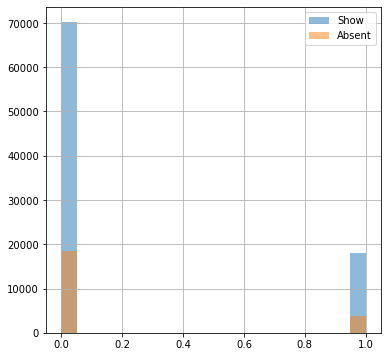

In [220]:
df.hypertension[show].hist(figsize=(6,6),bins=20,alpha=0.5,label="Show")
df.hypertension[absent].hist(figsize=(6,6),bins=20,alpha=0.5,label="Absent")
plt.legend()

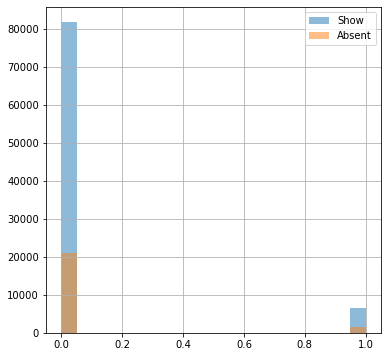

In [219]:
df.diabetes[show].hist(figsize=(6,6),bins=20,alpha=0.5,label="Show")
df.diabetes[absent].hist(figsize=(6,6),bins=20,alpha=0.5,label="Absent")
plt.legend()

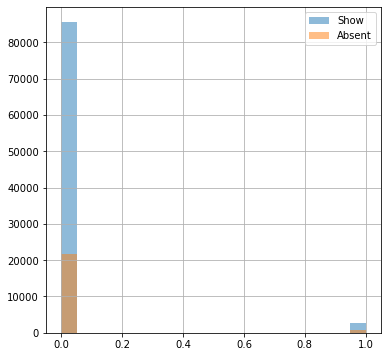

In [218]:
df.alcoholism[show].hist(figsize=(6,6),bins=20,alpha=0.5,label="Show")
df.alcoholism[absent].hist(figsize=(6,6),bins=20,alpha=0.5,label="Absent")
plt.legend()

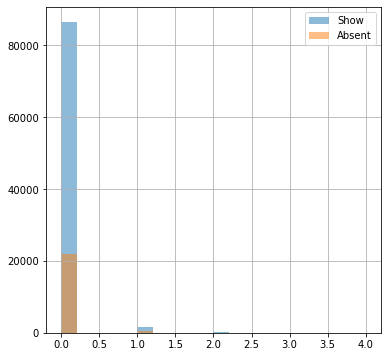

In [217]:
df.handicap[show].hist(figsize=(6,6),bins=20,alpha=0.5,label="Show")
df.handicap[absent].hist(figsize=(6,6),bins=20,alpha=0.5,label="Absent")
plt.legend()

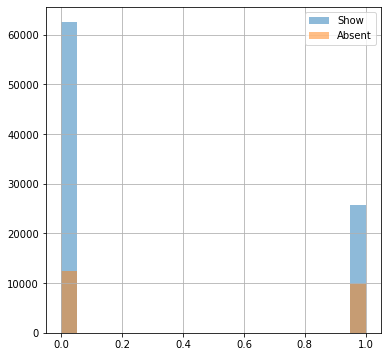

In [216]:
df.sms_received[show].hist(figsize=(6,6),bins=20,alpha=0.5,label="Show")
df.sms_received[absent].hist(figsize=(6,6),bins=20,alpha=0.5,label="Absent")
plt.legend()

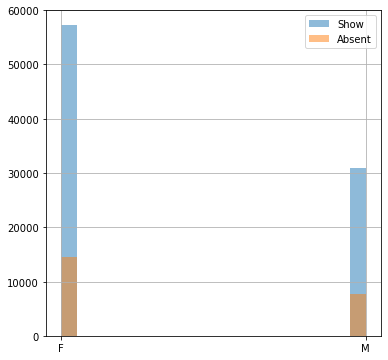

In [223]:
df.gender[show].hist(figsize=(6,6),bins=20,alpha=0.5,label="Show")
df.gender[absent].hist(figsize=(6,6),bins=20,alpha=0.5,label="Absent")
plt.legend()

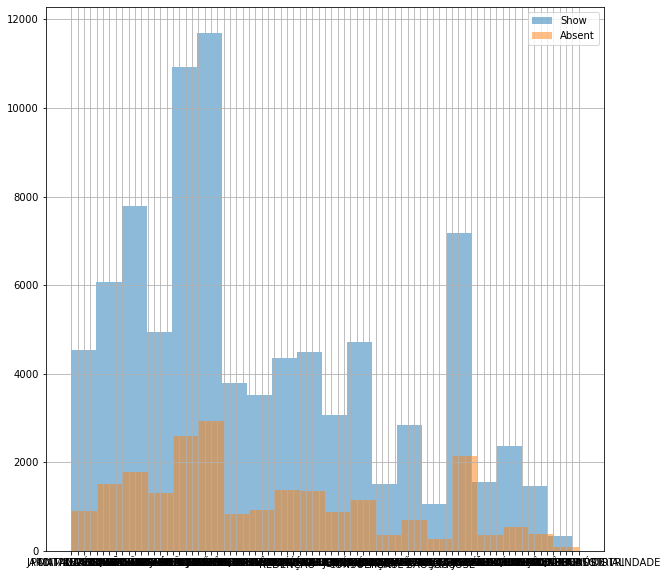

In [231]:
df.neighbourhood[show].hist(figsize=(10,10),bins=20,alpha=0.5,label="Show")
df.neighbourhood[absent].hist(figsize=(10,10),bins=20,alpha=0.5,label="Absent")
plt.legend()

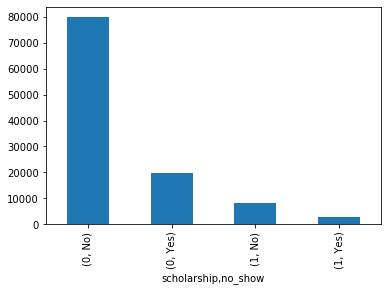

In [247]:
df.groupby("scholarship").no_show.value_counts().plot(kind="bar")

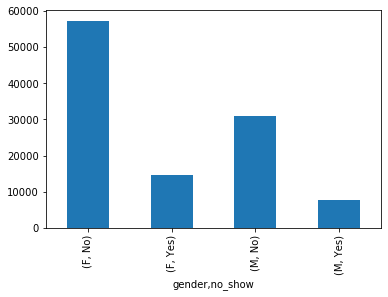

In [248]:
df.groupby("gender").no_show.value_counts().plot(kind="bar")

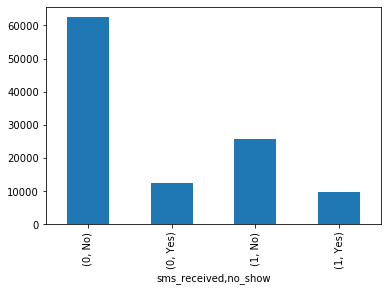

In [249]:
df.groupby("sms_received").no_show.value_counts().plot(kind="bar")

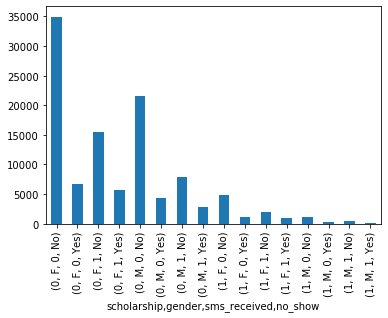

In [254]:
df.groupby(["scholarship","gender","sms_received"]).no_show.value_counts().plot(kind="bar")

In [255]:
df.scholarship[absent].value_counts()

0    19741
1     2578
Name: scholarship, dtype: int64

In [256]:
df.scholarship[show].value_counts()

0    79925
1     8283
Name: scholarship, dtype: int64

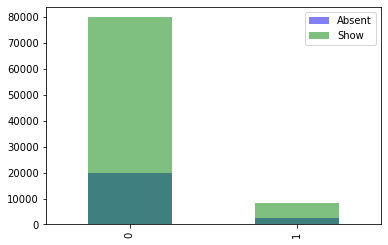

In [268]:
df.scholarship[absent].value_counts().plot(kind="bar",color="blue",alpha=0.5,label="Absent")
df.scholarship[show].value_counts().plot(kind="bar",color="green",alpha=0.5,label="Show")
plt.legend()

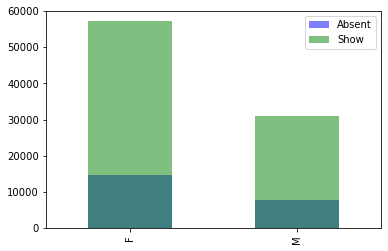

In [269]:
df.gender[absent].value_counts().plot(kind="bar",color="blue",alpha=0.5,label="Absent")
df.gender[show].value_counts().plot(kind="bar",color="green",alpha=0.5,label="Show")
plt.legend()

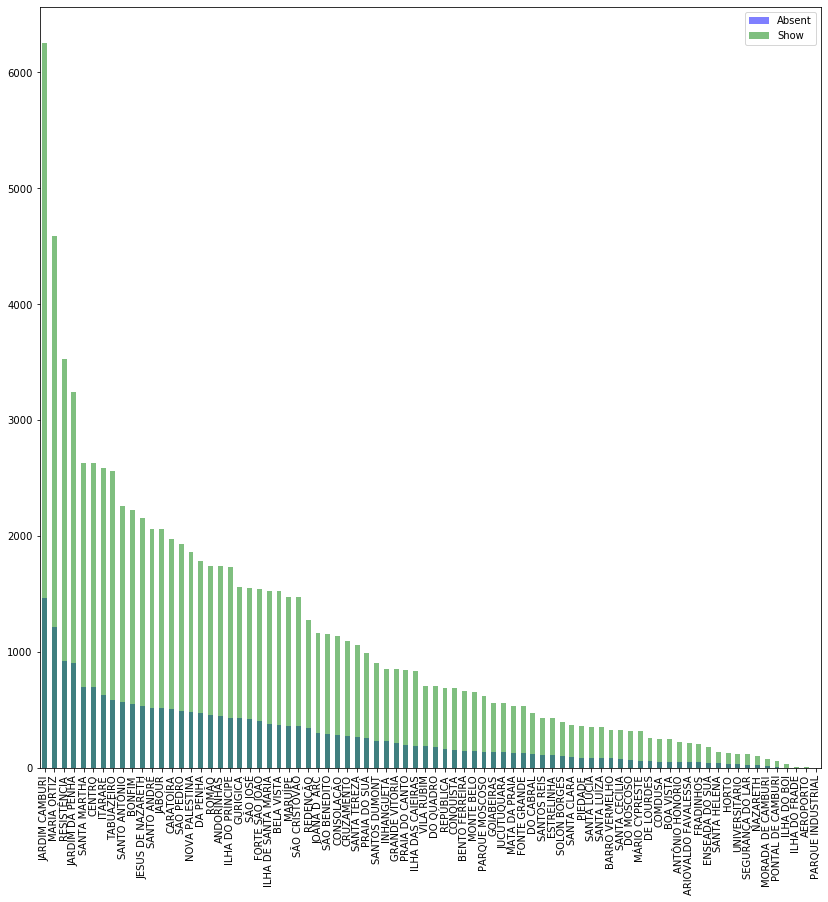

In [278]:
df.neighbourhood[absent].value_counts().plot(kind="bar",color="blue",alpha=0.5,label="Absent",figsize=(14,14))
df.neighbourhood[show].value_counts().plot(kind="bar",color="green",alpha=0.5,label="Show",figsize=(14,14))

plt.legend()

# The most affecting parametrs (scholarship,gender,neighbourhood,sms) in details

In [236]:
def location(df):# neighbourhood effect on no-show
	locations_noshow=df.query("no_show=='Yes' ")
	locations=locations_noshow["neighbourhood"].value_counts() 
	locations_dict=locations.to_dict()
	labels=[]
	heights=[]
	for k,v in locations_dict.items():
		labels.append(k)
		heights.append(v)
	def top_ten():
		all_neighbourhoods=list(zip(labels,heights))
		top_tens=all_neighbourhoods[ : 20]
		return top_tens
		
	def scatter():
		x=[x for x in range(1,len(heights)+1)]
		y=heights
		plt.figure(figsize=(12, 12), dpi=80)
		plt.scatter(x,y,c="blue")
		plt.xlabel("Neighbourhood")
		plt.ylabel("Number of absent patients")
		plt.title("No_Show patients by neighbourhood ")
		counter=0
		
		for x,y in zip(x,y):
			
			if counter<3:
				
				label = labels[counter]
				plt.annotate(label, # this is the text
						 (x,y), # this is the point to label
						 textcoords="offset points", # how to position the text
						 xytext=(20,-20), # distance from text to points (x,y)
						 ha='center') # horizontal alignment can be left, right or center
				
			
			counter+=1
		top=top_ten()
		x_start=50
		y_start=1400
		for item in top:
			plt.text(x_start, y_start,item)
			y_start-=60	
			
		plt.show()
	scatter()
	top_ten()

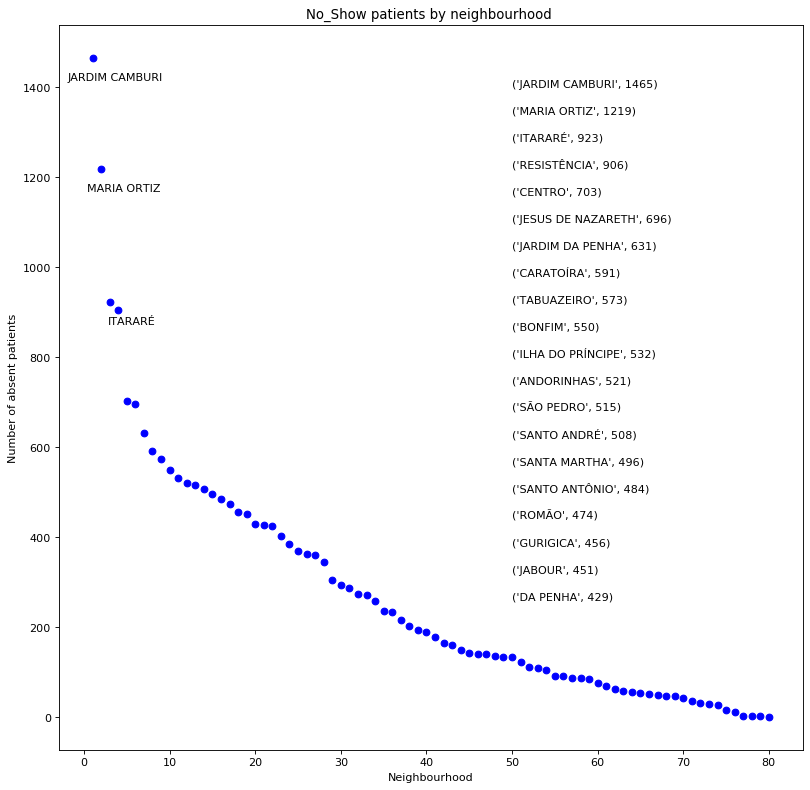

In [237]:
location(df)

In [238]:
def scholarship(df):#scholarship effect on no-show
	print(df["scholarship"].value_counts())
	print(df["no_show"].value_counts())
	scholarship_on=df.query("scholarship==1 ")  #build new dataset with only scholarship patients
	scholarship_off=df.query("scholarship==0 ")
	hp_noshow_gotscholarship=scholarship_on.groupby(["gender","no_show"]).count().scholarship  #compare gender 
	hp_noshow_noscholarship=scholarship_off.groupby(["gender","no_show"]).count().scholarship
	count_list=[]
	count1_list=[]
	#get total number of no show
	total_noshow=df.query("no_show=='Yes' ")
	total_scholarship=total_noshow["no_show"].count()
	total1_scholarship=scholarship_off["scholarship"].count()
	for item in hp_noshow_gotscholarship:
		count_list.append(item)
	scholarship_female_noshow_gotscholarship=count_list[1]
	scholarship_male_noshow_gotscholarship=count_list[3]
	for item in hp_noshow_noscholarship:
		count1_list.append(item)
	scholarship_female_noshow_noscholarship=count1_list[1]
	scholarship_male_noshow_noscholarship=count1_list[3]
	scholarship_on_female_noshow_perc=scholarship_female_noshow_gotscholarship/total_scholarship*100
	scholarship_on_male_noshow_perc=scholarship_male_noshow_gotscholarship/total_scholarship*100
	scholarship_off_female_noshow_perc=scholarship_female_noshow_noscholarship/total_scholarship*100
	scholarship_off_male_noshow_perc=scholarship_male_noshow_noscholarship/total_scholarship*100
	def bar():
		locations=[1,2,3,4]
		labels=["got_scholarship female ","got_scholarship male ","Noscholarship F","Noscholarship M"]
		heights=[scholarship_female_noshow_gotscholarship,scholarship_male_noshow_gotscholarship,scholarship_female_noshow_noscholarship,scholarship_male_noshow_noscholarship]
		plt.bar(locations,heights,tick_label=labels)
		plt.xlabel("No Show scholarship Patients by Gender")
		plt.ylabel("Number of absent patients")
		plt.title("No_Show patients by gender and scholarship ")
		plt.show()
	def barPer():
		locations=[1,2,3,4]
		labels=["scholarship_on female  %","scholarship_on male  %","scholarship_off female  %","scholarship_offmale  %"]
		heights=[scholarship_on_female_noshow_perc,scholarship_on_male_noshow_perc,scholarship_off_female_noshow_perc,scholarship_off_male_noshow_perc]
		plt.bar(locations,heights,tick_label=labels)
		plt.xlabel("No Showscholarship Patients by Gender")
		plt.ylabel("Percentage of absent patients")
		plt.title("Percentage of No_Show patients by gender and scholarship ")
		plt.show()
	bar()
	barPer()

0    99666
1    10861
Name: scholarship, dtype: int64
No     88208
Yes    22319
Name: no_show, dtype: int64


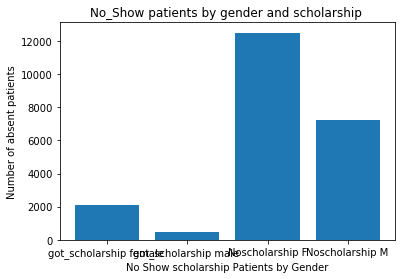

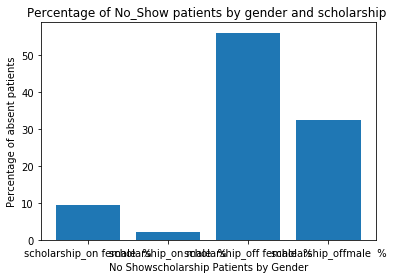

In [239]:
scholarship(df)

In [240]:
def gender(df):# gender effect on no-show
	
	males=df.query("gender=='M' ")  #build new dataset with only gender patients
	females=df.query("gender=='F' ")
	#absent=df.query("no_show=='Yes' ")
	males_noshow=males.groupby(["no_show"]).count().gender  #compare gender 
	females_noshow=females.groupby(["no_show"]).count().gender  #compare gender 
	
	male_list=[]
	for item in males_noshow:
		male_list.append(item)
	males_noshows=male_list[1]
	female_list=[]
	for item in females_noshow:
		female_list.append(item)
	females_noshows=female_list[1]
	male_perc=males_noshows/(males_noshows+females_noshows)*100
	female_perc=females_noshows/(males_noshows+females_noshows)*100
	def bar():
		locations=[1,2]
		labels=[" Female "," Male "]
		heights=[females_noshows,males_noshows]
		plt.bar(locations,heights,tick_label=labels)
		plt.xlabel("No Show Patients by Gender ")
		plt.ylabel("Number of absent patients")
		plt.title(" Gender")
		plt.show()
	def barPer():
		locations=[1,2]
		labels=["Female  %","Male  %"]
		heights=[female_perc,male_perc]
		plt.bar(locations,heights,tick_label=labels)
		plt.xlabel("No Show Patients by Gender")
		plt.ylabel("Percentage of absent patients")
		plt.title("Percentage of No_Show patients by gender  ")
		plt.show()
	
	bar()
	barPer()

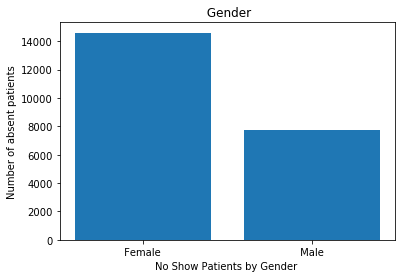

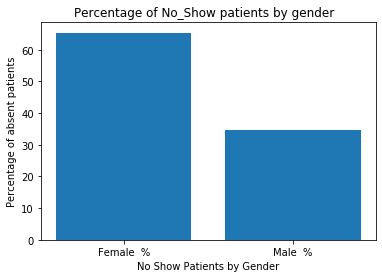

In [241]:
gender(df)

In [250]:
def sms(df):#sms effect on no-show
	print(df["sms_received"].value_counts())
	print(df["no_show"].value_counts())
	sms_on=df.query("sms_received==1 ")  #build new dataset with only diabetic patients
	sms_off=df.query("sms_received==0 ")
	hp_noshow_gotSms=sms_on.groupby(["gender","no_show"]).count().sms_received  #compare gender and no_show with hypertensive patients
	hp_noshow_noSms=sms_off.groupby(["gender","no_show"]).count().sms_received
	count_list=[]
	count1_list=[]
	#get total number of no show
	total_noshow=df.query("no_show=='Yes' ")
	total_sms=total_noshow["no_show"].count()
	print("sms_received",total_sms)
	total1_sms=sms_off["sms_received"].count()
	for item in hp_noshow_gotSms:
		count_list.append(item)
	sms_female_noshow_gotSms=count_list[1]
	sms_male_noshow_gotSms=count_list[3]
	for item in hp_noshow_noSms:
		count1_list.append(item)
	sms_female_noshow_noSms=count1_list[1]
	sms_male_noshow_noSms=count1_list[3]
	sms_on_female_noshow_perc=sms_female_noshow_gotSms/total_sms*100
	sms_on_male_noshow_perc=sms_male_noshow_gotSms/total_sms*100
	sms_off_female_noshow_perc=sms_female_noshow_noSms/total_sms*100
	sms_off_male_noshow_perc=sms_male_noshow_noSms/total_sms*100
	def bar():
		locations=[1,2,3,4]
		labels=["got_sms female ","got_sms male ","NoSms F","NoSms M"]
		heights=[sms_female_noshow_gotSms,sms_male_noshow_gotSms,sms_female_noshow_noSms,sms_male_noshow_noSms]
		plt.bar(locations,heights,tick_label=labels)
		plt.xlabel("No Show sms Patients by Gender")
		plt.ylabel("Number of absent patients")
		plt.title("No_Show patients by gender and sms ")
		plt.show()
	def barPer():
		locations=[1,2,3,4]
		labels=["sms_on female  %","sms_on male  %","sms_off female  %","sms_offmale  %"]
		heights=[sms_on_female_noshow_perc,sms_on_male_noshow_perc,sms_off_female_noshow_perc,sms_off_male_noshow_perc]
		plt.bar(locations,heights,tick_label=labels)
		plt.xlabel("No Showsms Patients by Gender")
		plt.ylabel("Percentage of absent patients")
		plt.title("Percentage of No_Show patients by gender and sms ")
		plt.show()
	bar()
	barPer()
def scholarship(df):#scholarship effect on no-show
	print(df["scholarship"].value_counts())
	print(df["no_show"].value_counts())
	scholarship_on=df.query("scholarship==1 ")  #build new dataset with only scholarship patients
	scholarship_off=df.query("scholarship==0 ")
	hp_noshow_gotscholarship=scholarship_on.groupby(["gender","no_show"]).count().scholarship  #compare gender 
	hp_noshow_noscholarship=scholarship_off.groupby(["gender","no_show"]).count().scholarship
	count_list=[]
	count1_list=[]
	#get total number of no show
	total_noshow=df.query("no_show=='Yes' ")
	total_scholarship=total_noshow["no_show"].count()
	total1_scholarship=scholarship_off["scholarship"].count()
	for item in hp_noshow_gotscholarship:
		count_list.append(item)
	scholarship_female_noshow_gotscholarship=count_list[1]
	scholarship_male_noshow_gotscholarship=count_list[3]
	for item in hp_noshow_noscholarship:
		count1_list.append(item)
	scholarship_female_noshow_noscholarship=count1_list[1]
	scholarship_male_noshow_noscholarship=count1_list[3]
	scholarship_on_female_noshow_perc=scholarship_female_noshow_gotscholarship/total_scholarship*100
	scholarship_on_male_noshow_perc=scholarship_male_noshow_gotscholarship/total_scholarship*100
	scholarship_off_female_noshow_perc=scholarship_female_noshow_noscholarship/total_scholarship*100
	scholarship_off_male_noshow_perc=scholarship_male_noshow_noscholarship/total_scholarship*100
	def bar():
		locations=[1,2,3,4]
		labels=["got_scholarship female ","got_scholarship male ","Noscholarship F","Noscholarship M"]
		heights=[scholarship_female_noshow_gotscholarship,scholarship_male_noshow_gotscholarship,scholarship_female_noshow_noscholarship,scholarship_male_noshow_noscholarship]
		plt.bar(locations,heights,tick_label=labels)
		plt.xlabel("No Show scholarship Patients by Gender")
		plt.ylabel("Number of absent patients")
		plt.title("No_Show patients by gender and scholarship ")
		plt.show()
	def barPer():
		locations=[1,2,3,4]
		labels=["scholarship_on female  %","scholarship_on male  %","scholarship_off female  %","scholarship_offmale  %"]
		heights=[scholarship_on_female_noshow_perc,scholarship_on_male_noshow_perc,scholarship_off_female_noshow_perc,scholarship_off_male_noshow_perc]
		plt.bar(locations,heights,tick_label=labels)
		plt.xlabel("No Showscholarship Patients by Gender")
		plt.ylabel("Percentage of absent patients")
		plt.title("Percentage of No_Show patients by gender and scholarship ")
		plt.show()
	bar()
	barPer()

0    75045
1    35482
Name: sms_received, dtype: int64
No     88208
Yes    22319
Name: no_show, dtype: int64
sms_received 22319


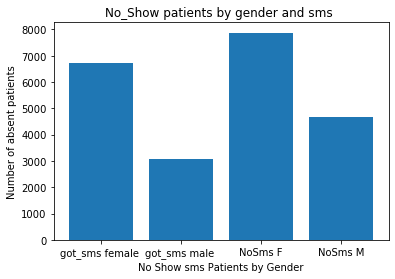

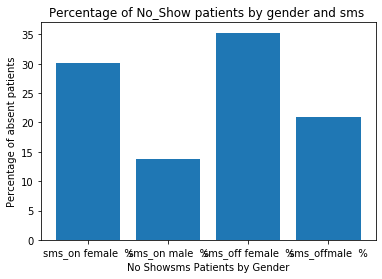

In [251]:
sms(df)

# Conclusion
## The most affecting parameters are:
### I. Scholarship
### II.Gender
### III.Neighborhood
### IV.SMS